In [1]:
#%run InitialDataCleanup.ipynb
#IPython.display.clear_output()

In [2]:
%run InitialDataCleanup_Ratawfiq16042021.ipynb
IPython.display.clear_output()

In [3]:
df = result
df.tail()

,initclaims_count_regular,contclaims_count_regular,initclaims_count_combined,contclaims_count_combined,contclaims_count_pua,bg_posts_ss60,bg_posts_ss70,bg_posts_ss55,bg_posts_ss65,case_count,...,emp_combined_ss65,spend_acf,spend_hcs,spend_aer,spend_apg,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_transit_stations,gps_workplaces,gps_away_from_home
2021-03-02,11452.428571,169619.714286,15359.142857,694392.285714,342022.714286,-0.093543,-0.121143,-0.054843,0.074086,613391.0,...,0.0121,-0.121,-0.1380,-0.1400,0.0655,-0.174,-0.0943,-0.273,-0.229,-0.0952
2021-03-03,11437.571429,166754.285714,15297.857143,749795.714286,382343.285714,-0.103029,-0.126429,-0.055029,0.058857,614731.0,...,0.0121,-0.136,-0.1520,-0.0731,0.0676,-0.163,-0.0857,-0.264,-0.229,-0.0936
2021-03-04,11422.714286,163888.857143,15236.571429,805199.142857,422663.857143,-0.112514,-0.131714,-0.055214,0.043629,616099.0,...,0.0121,-0.144,-0.1440,-0.0315,0.0831,-0.159,-0.0843,-0.263,-0.229,-0.0936
2021-03-05,11407.857143,161023.428571,15175.285714,860602.571429,462984.428571,-0.122000,-0.137000,-0.055400,0.028400,617541.0,...,0.0121,-0.121,-0.0104,0.0308,0.1160,-0.156,-0.0829,-0.261,-0.229,-0.0936
2021-03-06,11393.000000,158158.000000,15114.000000,916006.000000,503305.000000,-0.122000,-0.137000,-0.055400,0.028400,619020.0,...,0.0121,-0.103,-0.0102,0.0550,0.1250,-0.153,-0.0814,-0.260,-0.227,-0.0936


In [4]:
#target_names = ['contclaims_count_regular']
target_names = list(df.columns)

In [58]:
split_fraction = 0.7
train_split = int(split_fraction * int(df.shape[0]))
step = 1

past = 20
future = 1
learning_rate = 0.001
batch_size = 10

sequence_length = int(past / step)

In [59]:
titles = list(df.columns)
features = df[titles]
features.head()

,initclaims_count_regular,contclaims_count_regular,initclaims_count_combined,contclaims_count_combined,contclaims_count_pua,bg_posts_ss60,bg_posts_ss70,bg_posts_ss55,bg_posts_ss65,case_count,...,emp_combined_ss65,spend_acf,spend_hcs,spend_aer,spend_apg,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_transit_stations,gps_workplaces,gps_away_from_home
2020-03-07,5150.000000,77661.0,5150.000000,77661.0,0.0,-0.029977,0.192571,-0.01244,-0.091771,0.0,...,0.00657,-0.02470,-0.04850,-0.0301,-0.06240,0.1070,0.0471,0.1070,0.0257,0.0156
2020-03-08,5176.857143,77389.0,5176.857143,77389.0,0.0,-0.068814,0.110143,-0.03320,-0.094143,0.0,...,0.00691,-0.02630,-0.04410,-0.0061,-0.02940,0.1070,0.0486,0.0943,0.0257,0.0156
2020-03-09,5203.714286,77117.0,5203.714286,77117.0,0.0,-0.107651,0.027714,-0.05396,-0.096514,0.0,...,0.00730,-0.02080,-0.08960,-0.0261,-0.03220,0.1030,0.0486,0.0914,0.0257,0.0139
2020-03-10,5230.571429,76845.0,5230.571429,76845.0,0.0,-0.146489,-0.054714,-0.07472,-0.098886,0.0,...,0.00761,-0.00693,0.04930,-0.0433,-0.00284,0.1010,0.0457,0.0871,0.0229,0.0125
2020-03-11,5257.428571,76573.0,5257.428571,76573.0,0.0,-0.185326,-0.137143,-0.09548,-0.101257,1.0,...,0.00773,-0.00897,0.00343,-0.0713,-0.01740,0.0957,0.0586,0.0800,0.0229,0.0109


In [60]:
start = past + future
end = start + train_split

x_data = features.values[0: -start]
y_data = features[target_names].values[start:]

x_train = x_data[:train_split]
x_val = x_data[train_split:]

y_train = y_data[:train_split]
y_val = y_data[train_split:]

x_scaler = MinMaxScaler()
x_train_scaled = x_scaler.fit_transform(x_train)
x_val_scaled = x_scaler.transform(x_val)

y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_val_scaled = y_scaler.transform(y_val)

len(x_train) + len(x_val), len(y_train) + len(y_val), len(features)

(344, 344, 365)

In [61]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train_scaled,
    y_train_scaled,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [62]:
dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val_scaled,
    y_val_scaled,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [63]:
for batch in dataset_train.take(1):
    inputs, targets = batch
print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

print('dataset val')
i = 0
for j in dataset_val:
    x, y = j
    print('x shape:', x.shape)
    print('y shape:', y.shape)
    i = i + 1

print(f'length of x_val: {len(x_val)}')
print(f'length of validation data: {len(dataset_val)}')
print(f'number of batches: {i}')

Input shape: (10, 20, 31)
Target shape: (10, 31)
dataset val
x shape: (10, 20, 31)
y shape: (10, 31)
x shape: (10, 20, 31)
y shape: (10, 31)
x shape: (10, 20, 31)
y shape: (10, 31)
x shape: (10, 20, 31)
y shape: (10, 31)
x shape: (10, 20, 31)
y shape: (10, 31)
x shape: (10, 20, 31)
y shape: (10, 31)
x shape: (10, 20, 31)
y shape: (10, 31)
length of x_val: 89
length of validation data: 7
number of batches: 7


In [64]:
model = tf.keras.Sequential([
    keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2])),
    keras.layers.LSTM(32, activation='tanh'),
    keras.layers.Dense(len(target_names))
])
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 32)                8192      
_________________________________________________________________
dense_4 (Dense)              (None, 31)                1023      
Total params: 9,215
Trainable params: 9,215
Non-trainable params: 0
_________________________________________________________________


In [65]:

#%load_ext tensorboard
import os
import shutil
from datetime import datetime

path_checkpoint = "covid_model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

epochs = 30

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

if os.path.exists('./logs'):
    shutil.rmtree('./logs/')
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback, tensorboard_callback],
)

Epoch 1/30
24/24 [==============================] - ETA: 1s - loss: 0.127 - ETA: 0s - loss: 0.212 - ETA: 0s - loss: 0.251 - ETA: 0s - loss: 0.252 - ETA: 0s - loss: 0.235 - ETA: 0s - loss: 0.2180
Epoch 00001: val_loss improved from inf to 0.18400, saving model to covid_model_checkpoint.h5
24/24 [==============================] - 1s 60ms/step - loss: 0.2180 - val_loss: 0.1840
Epoch 2/30
21/24 [=========================>....] - ETA: 0s - loss: 0.128 - ETA: 0s - loss: 0.092 - ETA: 0s - loss: 0.084 - ETA: 0s - loss: 0.071 - ETA: 0s - loss: 0.0632
Epoch 00002: val_loss improved from 0.18400 to 0.15276, saving model to covid_model_checkpoint.h5
24/24 [==============================] - 0s 18ms/step - loss: 0.0609 - val_loss: 0.1528
Epoch 3/30
20/24 [========================>.....] - ETA: 0s - loss: 0.133 - ETA: 0s - loss: 0.073 - ETA: 0s - loss: 0.060 - ETA: 0s - loss: 0.042 - ETA: 0s - loss: 0.0352
Epoch 00003: val_loss improved from 0.15276 to 0.14250, saving model to covid_model_checkpoint.

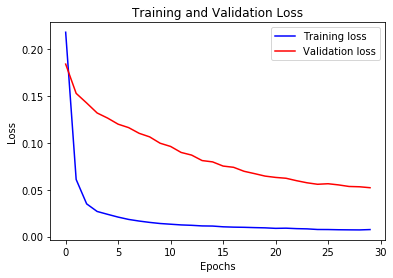

In [66]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

In [67]:
result = model.evaluate(x=np.expand_dims(x_val_scaled[-past:], axis=0),
                        y=np.expand_dims(y_val_scaled[-past:], axis=0))

1/1 [==============================] - ETA: 0s - loss: 0.067 - 0s 6ms/step - loss: 0.0675


In [68]:
def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 2) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return

Prediction: [ 1.0310481e+04  9.5063539e+04  5.5239430e+04  8.6690869e+05
  2.7890262e+05 -2.3453176e-01 -8.1923246e-02 -1.1976180e-01
 -1.6894752e-01  2.8282481e+05  7.6669697e+03  6.3835120e+06
 -2.8036261e-01 -7.1020353e-01 -2.6489624e-01 -3.7759340e-01
 -2.7427226e-01 -6.7145683e-02 -2.5990945e-03  2.9463571e-02
 -2.1741156e-01  6.7254687e-03 -2.3884901e-01 -4.8648885e-01
 -3.9983472e-01 -3.0940866e-02 -2.6634642e-01 -1.4639859e-01
 -3.9089975e-01 -2.8272775e-01 -1.4327694e-01]


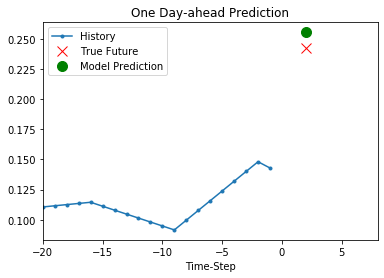

In [69]:
for x, y in dataset_val.take(1):
    #print('Y:', y_scaler.inverse_transform(y)[0])
    prediction = model.predict(x)
    #print('pred shape:', prediction.shape)
    print('Prediction:', y_scaler.inverse_transform(prediction)[0])
    show_plot(
        [x[0][:, 1].numpy(), y[0][3].numpy(), prediction[0][3]],
        2,
        "One Day-ahead Prediction",
    )

In [70]:
DAYS_TO_PREDICT = 30

features_pred = df[-20:].to_numpy()
last_df = df[-1:]
pre_covid_ui_claims = 72103
print(f'pre-covid UI claims {pre_covid_ui_claims}')
num_of_days = 0
last_date = df[-1:].index.date[0]
print('last date in the dataset:', last_date)
print(f'UI claims on the last day {last_date}: {df[-1:]["contclaims_count_combined"]}')
preds = []
for i in range(DAYS_TO_PREDICT):
    x_pred_scaled = x_scaler.transform(features_pred)
    dataset_pred = keras.preprocessing.timeseries_dataset_from_array(
        x_pred_scaled,
        None,
        sequence_length=sequence_length,
        sampling_rate=step,
        batch_size=batch_size,
    )

    for batch in dataset_pred.take(1):
        x = batch
    pred = model.predict(x)
    preds.append(pred[0])
    num_of_days = num_of_days + 1
    pred_ui_claims = y_scaler.inverse_transform(pred)[0][3]
    if (pred_ui_claims <= pre_covid_ui_claims):
        print(f'predicted UI claims {pred_ui_claims} is less than or equal to pre-covid level {pre_covid_ui_claims} after {num_of_days} days')
        break
    else:
        print(f'predicted value {pred_ui_claims} not meeting the threshold after {num_of_days} days')
    pred_actual = y_scaler.inverse_transform(pred)
    features_pred  = np.vstack([features_pred, pred_actual])
    features_pred = features_pred[1:]

print('Done...')

pre-covid UI claims 72103
last date in the dataset: 2021-03-06
UI claims on the last day 2021-03-06: 2021-03-06    916006.0
Freq: D, Name: contclaims_count_combined, dtype: float64
predicted value 1078394.75 not meeting the threshold after 1 days
predicted value 941523.1875 not meeting the threshold after 2 days
predicted value 886394.5625 not meeting the threshold after 3 days
predicted value 836336.0 not meeting the threshold after 4 days
predicted value 799764.5625 not meeting the threshold after 5 days
predicted value 772872.875 not meeting the threshold after 6 days
predicted value 752958.25 not meeting the threshold after 7 days
predicted value 737930.625 not meeting the threshold after 8 days
predicted value 726395.5625 not meeting the threshold after 9 days
predicted value 717346.375 not meeting the threshold after 10 days
predicted value 710141.3125 not meeting the threshold after 11 days
predicted value 704358.1875 not meeting the threshold after 12 days
predicted value 69974

In [71]:
predicted_ui_claims = y_scaler.inverse_transform(preds)

pred_arr = []
for i in range(len(predicted_ui_claims)):
    pred_arr.append(predicted_ui_claims[i][3])
    
predicted_index = pd.date_range(
  start=df.index[-1],
  periods=DAYS_TO_PREDICT + 1,
  closed='right'
)

predicted_ui = pd.Series(
  data=pred_arr,
  index=predicted_index
)

In [72]:
selected_cols=['contclaims_count_combined']
ui_claims_feb = prepare_data('UI Claims - State - Weekly.csv', day='day_endofweek', start_date='2021-03-06', end_date='2021-03-27', selected_cols=selected_cols, interpolate=True)
ui_claims_feb = ui_claims_feb[1:]
ui_claims_feb.head()

,contclaims_count_combined
2021-03-07,868106.0
2021-03-08,820206.0
2021-03-09,772306.0
2021-03-10,724406.0
2021-03-11,676506.0


In [73]:
predicted_ui.head()

2021-03-07    1.078395e+06
2021-03-08    9.415232e+05
2021-03-09    8.863945e+05
2021-03-10    8.363360e+05
2021-03-11    7.997645e+05
Freq: D, dtype: float64

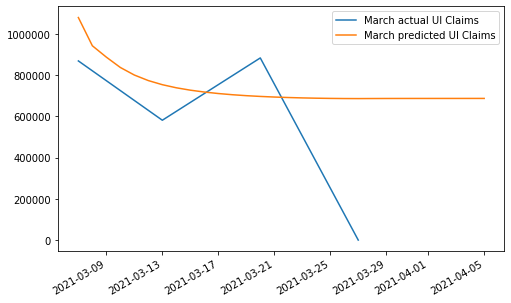

In [74]:
import matplotlib.dates as mdates

plt.figure(figsize=(8,5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()

plt.plot(ui_claims_feb, label='March actual UI Claims')
plt.plot(predicted_ui, label='March predicted UI Claims')
plt.legend()